## Assignment #5 - Yahaira Cortez


## Step #2 Use requests and BeautifulSoup to make a list of all the CORGIS datasets.

In [ ]:
import requests
from bs4 import BeautifulSoup
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [ ]:
response

In [ ]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document.find('h3')

In [ ]:
document.find_all('h3')

In [70]:
corgis_list = []

for i in document.find_all('h3'):
   # corgis_list.append(i)
    corgis_list.append(i.text.strip())

corgis_list
#list of datasets

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

## Step #3 Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

In [ ]:
import pandas as pd
#importing pandas library

#pdcorgis function
def pdcorgis(a):
    a = a.lower()
    response_ =requests.get('https://corgis-edu.github.io/corgis/csv/' + a + '/')
    
    html_string = response_.text
    document = BeautifulSoup(html_string, "html.parser")

    for i in document.find_all('a'):
        if i.has_attr('download')==True:
            b = i['href']
            download_link = 'https://corgis-edu.github.io/corgis/csv/' + a + '/'+b
            corgisdf = pd.read_csv(download_link)
            return corgisdf
    

In [114]:
#testing function
df = pdcorgis(corgis_list[7])
df.head()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022


## Step 4: Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

<AxesSubplot:xlabel='bibliography.author.name'>

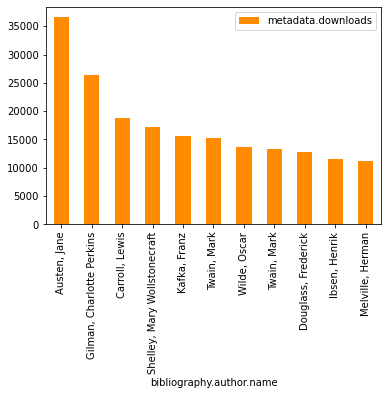

In [122]:
#classics dataset plotted as a bar plot

df = pdcorgis(corgis_list[7])
df_new =df.loc[0:10 , ['bibliography.author.name','metadata.downloads'] ]
df_new.plot(kind='bar',x='bibliography.author.name', y='metadata.downloads',color='darkorange' )

<AxesSubplot:xlabel='artist.terms'>

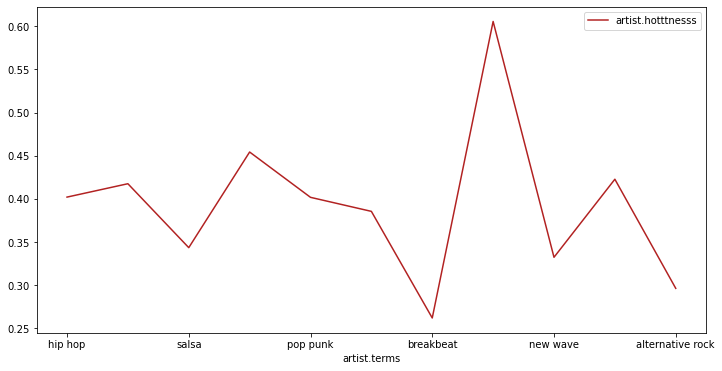

In [123]:
#music dataset plotted as line plot

df = pdcorgis(corgis_list[corgis_list.index("Music")])
df_new =df.loc[0:10 , ['artist.hotttnesss','artist.terms'] ]
df_new.plot(kind='line',x='artist.terms', y='artist.hotttnesss', figsize=(12,6), color ='firebrick')

array([[<AxesSubplot:title={'center':'Statistics.Attendance'}>]],
      dtype=object)

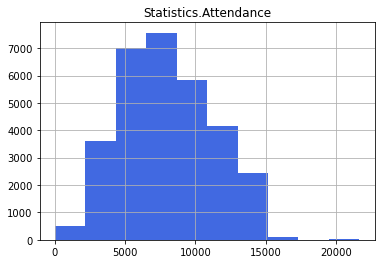

In [142]:
df = pdcorgis(corgis_list[corgis_list.index("Broadway")])
df.hist(column = 'Statistics.Attendance', color ='royalblue')